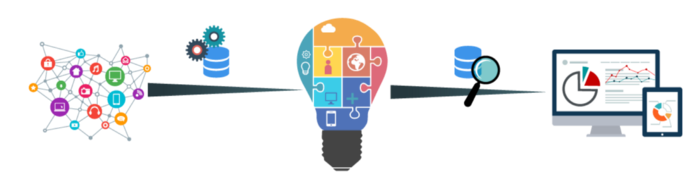

# Projeto Hashtag - Analisando engajamento do Instagram <br>

### Contexto: Será realizado uma análise dos dados do Instagram de uma empresa, do inicio até o dia 27/03, com objetivo de verificar qual tipo de conteúdo mais engaja, analisando apenas as curtidas, comentários e interações. <br>

### Dicionário de dados:
O arquivo em excel encontra-se na pasta _dataset e possui as seguintes colunas:
* Tipo: Tipos de míedias como fotos, vídeos, reels e IGTV
    * IGTV é uma plataforma de vídeo do Instagram que permite aos usuários compartilhar vídeos mais longos e em tela cheia.
    * Reels é um recurso do Instagram que permite aos usuários criar vídeos curtos e criativos de até 30 segundos, adicionando efeitos, música e filtros.
* Data: Data que as postagens ocorreram
* Curtida: Quantidade de curtidas em cada post
* Comentários: Quantidade de comentários em cada post
* Visualizações: Quantidade de visualizações em cada post
* Tags: As tags utilizandas em cada post
* Pessoas: Se existe a foto ou vídeo de uma pessoa. Os dados deveriam ser: Sim ou Não
* Campanhas: Os dados deveriam ser: Sim ou Não
* Carrossel: O Carrossel (ou sequência) permite que o usuário poste mais de uma imagem de uma única vez, podendo ter entre 2 e 10 imagens por post. Os dados deveriam ser: Sim ou Não
* Interações: Quantidade de interações em cada post

##### Passo 1 - Importando as blibliotecas

In [1]:
import pandas as pd
import numpy as np

##### Passo 2 - Importando a base de dados

In [2]:
df_exemplo_instagram = pd.read_excel(r'_dataset\08. Analisando o engajamento no Instagram.xlsx')

##### Passo 3 - Visualizando os dados e as informações dos dados

In [3]:
display(df_exemplo_instagram.head())

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [4]:
df_exemplo_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


##### Passo 4 - Tratando as colunas com valores nulos
* Visualizações  
* Tags           
* Carrossel      

##### a) Exluindo a coluna Visualizações

In [5]:
df_exemplo_instagram.drop('Visualizações', axis=1, inplace=True)

##### b) Alterar as linhas vazias para N na coluna Carrossel 

In [6]:
# Contando a quantidade de valores 
df_exemplo_instagram['Carrossel'].value_counts()

S    8
Name: Carrossel, dtype: int64

In [7]:
# Alterando os valores das linhas vazias para N
df_exemplo_instagram.loc[df_exemplo_instagram['Carrossel'].isnull(), 'Carrossel']='N'

In [8]:
# Contando a quantidade de valores 
df_exemplo_instagram['Carrossel'].value_counts()

N    44
S     8
Name: Carrossel, dtype: int64

##### c) A coluna Tag possue mais de uma tag por linhas. Exemplos:
* Dicas de como usar/Produtos
* Dicas de como usar/Novos Produtos
* Loja/Produtos 
* Trends/Produtos 
* Datas comemorativas/Promoções
##### Precisamos separar essas tags por linha para poder analisa-las, porém iremos fazer uma cópia da base de dados, pois afetará as análises das demais colunas ao "Duplicar" as linhas

In [9]:
# Contando a quantidade de valores 
df_exemplo_instagram['Tags'].value_counts()

Produtos                             12
Novos Produtos                        7
Influenciadores                       7
Datas comemorativas                   3
Trends                                3
Dicas de como usar/Produtos           3
Loja                                  2
Promoções                             2
Dicas de como usar/Novos Produtos     2
Loja/Produtos                         1
Trends/Produtos                       1
Datas comemorativas/Promoções         1
Name: Tags, dtype: int64

In [10]:
# Criando uma copia do Dataframe
df_exemplo_instagram_copia = df_exemplo_instagram.copy(deep=True)

In [11]:
# Divide as tags que estão separadas por / em uma lista de tags
df_exemplo_instagram_copia['Tags'] = df_exemplo_instagram_copia['Tags'].str.split('/')
# Adiciona cada 
df_exemplo_instagram_copia = df_exemplo_instagram_copia.explode('Tags')

# Transformando as linhas nulas em linhas com dados
df_exemplo_instagram_copia.loc[df_exemplo_instagram_copia['Tags'].isnull(), 'Tags']= 'Sem tags'

# Verificando a quantidade de linhas vazias
df_exemplo_instagram_copia['Tags'].isnull().sum()

0

In [12]:
# Visualizando os dados da copia que não possue tags
df_exemplo_instagram_copia.loc[df_exemplo_instagram['Tags'].isnull()].head(15)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,Sem tags,S,S,N,18222
19,Foto,2021-12-12,16086,268,Sem tags,S,S,N,16354
29,Foto,2022-01-19,8612,142,Sem tags,S,N,N,8754
38,Foto,2022-02-15,17687,213,Sem tags,S,N,N,17900
41,Foto,2022-02-22,12530,90,Sem tags,S,N,N,12620
43,Foto,2022-03-04,24399,266,Sem tags,S,S,N,24665
49,Foto,2022-03-22,9087,106,Sem tags,S,S,N,9193
50,Foto,2022-03-26,16551,186,Sem tags,S,N,N,16737


##### Passo 5 - Renomeando a coluna Interações
A coluna interações estava com um espaço no final da palavra, com isso, não estava conseguindo utilizar a coluna 

In [13]:
df_exemplo_instagram.rename(columns={'Interacoes ':'Interacoes'}, inplace=True)

##### Passo 6 - Visualizando as informações estatísticas descritivas

In [14]:
df_exemplo_instagram.describe()

,Curtidas,Comentários,Interacoes
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


##### Análise inicial das informações:
* Curtidas: Por que um post teve 37.351 e outro 2.807, se a média de curtidas é 12.262. O que o post de 37.351 tem para ter o máximo de curtidas e o de 2.807 não tem? 
* Comentários: Por que um post teve 852 e outro 9, se a média de comentários é de 852. O que o post de 852 tem para ter o máximo de comentários e o de 9 não tem? 
* Interações: Por que um post teve 37.853 e otro 2.816, se a média de comentários é de 12.452. O que o post de 37.853 tem para ter o máximo de interações e o de 2.816 não tem?

##### Passo 7 - Visualizando as informações das 3 variáveis utilizando gráficos

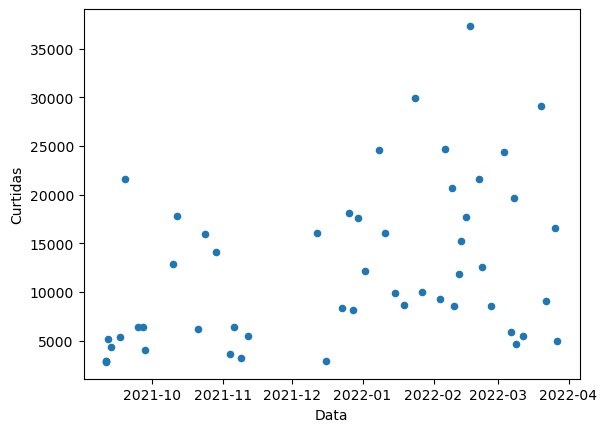

In [15]:
# Gráfico de dispersão da variável curtidas com relação a variável data
df_exemplo_instagram.plot.scatter(x='Data', y='Curtidas');

##### Análise inicial do gráfico de Curtidas em relação ao tempo:
Não existe uma relação de curtidas com ao tempo. Os dados estão dispersos, ou seja, as curtidas não estão aumentando e nem diminuindo com o tempo.

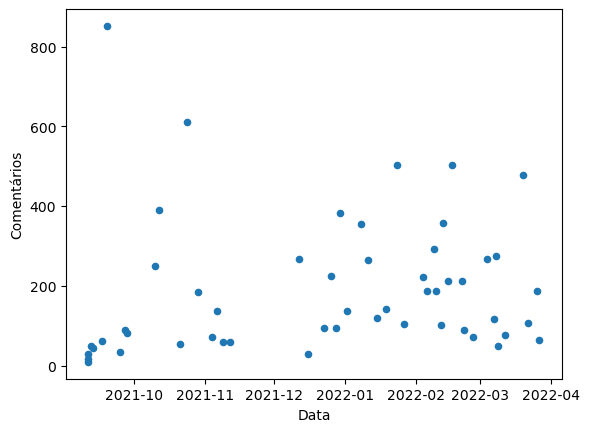

In [16]:
# Gráfico de dispersão da variável comentário com relação a variável data
df_exemplo_instagram.plot.scatter(x='Data', y='Comentários');

##### Análise inicial do gráfico de Comentário em relação ao tempo:
Não existe uma relação dos comentário com ao tempo. Os dados estão dispersos, ou seja, os comentários não estão aumentando e nem diminuindo com o tempo.

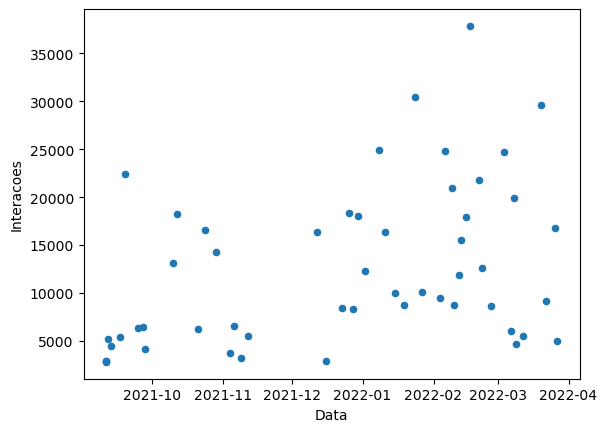

In [17]:
# Gráfico de dispersão da variável intereações com relação a variável data
df_exemplo_instagram.plot.scatter(x='Data', y='Interacoes');

##### Análise inicial do gráfico de Interações em relação ao tempo:
Não existe uma relação das interações com ao tempo. Os dados estão dispersos, ou seja, as interações não estão aumentando e nem diminuindo com o tempo.

##### Passo 8 - Analisando os dados com mais ou menos curtidas

In [18]:
# Os 5 posts com mais curtidas
df_exemplo_instagram.sort_values(by='Curtidas',ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [19]:
# Os 5 posts com menos curtidas
df_exemplo_instagram.sort_values(by='Curtidas',ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


##### Análise inicial dos posts:
* As fotos e vídeos com mais curtidas possuem pessoas e são de campanhas
* As fotos e vídeos com menos curtidas não possuem pessoas e não são de campanhas
* Ambos tipos de mídia possuem tags e não tem carrossel, ou seja, tag e carrossel não estão influenciando. Já pessoas e campanhas possuem uma correlação com a quantidade de curtidas, comentários e interações

##### Passo 9 - Analisando as correlações entre as variáveis Curtidas, Comentários e Interações

In [20]:
df_exemplo_instagram.corr(method='pearson')

,Curtidas,Comentários,Interacoes
Curtidas,1.000000,0.778160,0.999917
Comentários,0.778160,1.000000,0.786208
Interacoes,0.999917,0.786208,1.000000


##### Análise inicial utilizando o método de correlação: 
* Verificamos que existe uma relação extretamente forte entre curtidas e interações com 0.999917
* Verificamos que existe um relação forte entre curtidas e interações com comentários, com 0.778160 e 0.786208

##### Passo 10 - Analisando as variáveis Tipo, Pessoas e Campanhas com as variáveis Curtidas e Interações

In [21]:
df_exemplo_instagram.groupby(by=['Pessoas'])['Campanhas'].count()

Pessoas
N    12
S    40
Name: Campanhas, dtype: int64

##### a) Tipo de mídia Foto 

In [22]:
df_instagram_foto = df_exemplo_instagram.loc[df_exemplo_instagram['Tipo']=='Foto']
# df_instagram_foto['Curtidas'].sum() >>> 480281
# df_instagram_foto.groupby(by=['Pessoas'])['Curtidas'].sum() # N = 23181 e S = 457100

df_curtida_pessoa_foto = ((df_instagram_foto.groupby(by=['Pessoas'])['Curtidas'].sum()/df_instagram_foto['Curtidas'].sum())*100)
display(df_curtida_pessoa_foto)

df_curtida_campanha_foto = ((df_instagram_foto.groupby(by=['Campanhas'])['Curtidas'].sum()/df_instagram_foto['Curtidas'].sum())*100)
display(df_curtida_campanha_foto)

df_interacoes_pessoa_foto = ((df_instagram_foto.groupby(by=['Pessoas'])['Interacoes'].sum()/df_instagram_foto['Interacoes'].sum())*100)
display(df_interacoes_pessoa_foto)

df_interacoes_campanha_foto = ((df_instagram_foto.groupby(by=['Campanhas'])['Interacoes'].sum()/df_instagram_foto['Interacoes'].sum())*100)
display(df_interacoes_campanha_foto)

Pessoas
N     4.826549
S    95.173451
Name: Curtidas, dtype: float64

Campanhas
N    33.915562
S    66.084438
Name: Curtidas, dtype: float64

Pessoas
N     4.793902
S    95.206098
Name: Interacoes, dtype: float64

Campanhas
N    33.907242
S    66.092758
Name: Interacoes, dtype: float64

##### b) Tipo de mídia Reels 

In [23]:
df_instagram_reels = df_exemplo_instagram.loc[df_exemplo_instagram['Tipo']=='Reels']

df_curtida_pessoa_reels = ((df_instagram_reels.groupby(by=['Pessoas'])['Curtidas'].sum()/df_instagram_reels['Curtidas'].sum())*100)
display(df_curtida_pessoa_reels)

df_curtida_campanha_reels = ((df_instagram_reels.groupby(by=['Campanhas'])['Curtidas'].sum()/df_instagram_reels['Curtidas'].sum())*100)
display(df_curtida_campanha_reels)

df_interacoes_pessoa_reels = ((df_instagram_reels.groupby(by=['Pessoas'])['Interacoes'].sum()/df_instagram_reels['Interacoes'].sum())*100)
display(df_interacoes_pessoa_reels)

df_interacoes_campanha_reels = ((df_instagram_reels.groupby(by=['Campanhas'])['Interacoes'].sum()/df_instagram_reels['Interacoes'].sum())*100)
display(df_interacoes_campanha_reels)

Pessoas
N    15.960465
S    84.039535
Name: Curtidas, dtype: float64

Campanhas
N    33.299267
S    66.700733
Name: Curtidas, dtype: float64

Pessoas
N    15.961739
S    84.038261
Name: Interacoes, dtype: float64

Campanhas
N    33.34965
S    66.65035
Name: Interacoes, dtype: float64

##### c) Tipo de mídia Vídeo 

In [24]:
df_instagram_video = df_exemplo_instagram.loc[df_exemplo_instagram['Tipo']=='Vídeo']

df_curtida_pessoa_vídeo = ((df_instagram_video.groupby(by=['Pessoas'])['Curtidas'].sum()/df_instagram_video['Curtidas'].sum())*100)
display(df_curtida_pessoa_vídeo)

df_curtida_campanha_video = ((df_instagram_video.groupby(by=['Campanhas'])['Curtidas'].sum()/df_instagram_video['Curtidas'].sum())*100)
display(df_curtida_campanha_video)

df_interacoes_pessoa_vídeo = ((df_instagram_video.groupby(by=['Pessoas'])['Interacoes'].sum()/df_instagram_video['Interacoes'].sum())*100)
display(df_interacoes_pessoa_vídeo)

df_interacoes_campanha_video = ((df_instagram_video.groupby(by=['Campanhas'])['Interacoes'].sum()/df_instagram_video['Interacoes'].sum())*100)
display(df_interacoes_campanha_video)

Pessoas
N    32.815411
S    67.184589
Name: Curtidas, dtype: float64

Campanhas
N    32.815411
S    67.184589
Name: Curtidas, dtype: float64

Pessoas
N    32.68004
S    67.31996
Name: Interacoes, dtype: float64

Campanhas
N    32.68004
S    67.31996
Name: Interacoes, dtype: float64

##### Conclusão inicial:
* Podemos constar que não importa o tipo de mídia, as postagens que inclui pessoas tem mais curtidas e interações.
* Que o tipo Foto possui mais curtidas e interações que as demais mídias. Seguido do tipo de reels e por último vídeo. 

##### Passo 11 - Analisando a variável Tag com as variáveis Curtidas, Comentáriose Interações

In [25]:
# Verificando qual é o top 3 da tags mais curtidas, comentários e interações
df_exemplo_instagram_copia.groupby(by=['Tags'])[['Curtidas', 'Comentários', 'Interacoes ']].mean().sort_values(by='Curtidas',ascending=False).head(3)

,Curtidas,Comentários,Interacoes
Tags,,,
Promoções,27458.333333,531.00,27989.333333
Datas comemorativas,20752.250000,343.50,21095.750000
Trends,20024.000000,352.25,20376.250000


In [26]:
# Verificando se a variavel pessoa possue correlação forte com a variavel tag igual que teve com as outras variaveis
df_exemplo_instagram_copia.groupby(by=['Pessoas','Tags'])[['Curtidas', 'Comentários', 'Interacoes ']].mean().sort_values(by='Curtidas',ascending=False)

Curtidas  Comentários   Interacoes 
Pessoas Tags                                                        
S       Promoções            27458.333333   531.000000  27989.333333
        Datas comemorativas  20752.250000   343.500000  21095.750000
        Trends               20024.000000   352.250000  20376.250000
        Sem tags             15347.875000   207.750000  15555.625000
        Influenciadores      15197.285714   161.714286  15359.000000
        Novos Produtos       10923.125000   215.625000  11138.750000
        Produtos              8316.375000   131.625000   8448.000000
        Dicas de como usar    6833.400000   133.600000   6967.000000
N       Novos Produtos        5359.000000    62.000000   5421.000000
        Produtos              4450.666667    60.777778   4511.444444
        Loja                  2865.000000    17.666667   2882.666667

In [27]:
# Verificando se a variavel Campanhas possue correlação forte com a variavel tag igual que teve com as outras variaveis
df_exemplo_instagram_copia.groupby(by=['Campanhas','Tags'])[['Curtidas', 'Comentários', 'Interacoes ']].mean().sort_values(by='Curtidas',ascending=False)

Curtidas  Comentários   Interacoes 
Campanhas Tags                                                        
S         Promoções            33217.500000   490.500000  33708.000000
          Trends               22400.666667   386.666667  22787.333333
          Datas comemorativas  20752.250000   343.500000  21095.750000
          Influenciadores      18715.400000   197.600000  18913.000000
          Sem tags             16850.750000   257.750000  17108.500000
N         Promoções            15940.000000   612.000000  16552.000000
          Sem tags             13845.000000   157.750000  14002.750000
          Trends               12894.000000   249.000000  13143.000000
S         Novos Produtos       11040.666667   323.000000  11363.666667
N         Novos Produtos        9937.000000   136.333333  10073.333333
S         Produtos              9074.000000    67.500000   9141.500000
N         Dicas de como usar    6833.400000   133.600000   6967.000000
          Influenciadores       6402.000000    72.000000   6474.000000
          Produtos              5895.933333    97.666667   5993.600000
          Loja                  2865.000000    17.666667   2882.666667

##### Análise inicial da variável Tags
* Podemos constar que não importa o nome da Tag, principalmente nas tags mais engajadas, as postagens que inclui pessoas tem mais curtidas e interações.
* Que criar campanhas com tags ajuda na divulgação, pois recebem mais curtidas e interações. Exemplo:
    * Promoções com campanhas: 33.217,50 curtidas x Promoções sem campanhas: 15.940,00 curtidas (Diferença de 17.277,5 curtidas)
    * Trends com campanhas: 22.400,67 curtidas x Trends sem campanhas: 12.894,00 curtidas (Diferença de 9.506,67 curtidas)
    * Produtos com campanhas: 9.074,00 curtidas x Produtos sem campanhas: 5.895,93 curtidas (Diferença de 3.178,07 curtidasa)
* Que a tag "Loja" deve ser testadas utilizando pessoas. 
* Que a tag "Dicas de como usar" deve ser testadas utilizando campanhas. 
* Que usar tag "Influenciadores" em Campanhas é promissoras.
    * Com 18.715.40 curtidas
    * Sem 6.402,00 curtidas
* Que a utilização de Campanhas para novos produtos não foi tão promissora, tendo apenas 1.103,67 de curtidas a mais.   